### Question.4 Gradient Descent
#### Submitted by:Apurva Nikade

In [1]:
#Load required libraries
import pandas as pd
import numpy as np
import math

In [4]:
#load SAHeart csv file
data = pd.read_csv('telco_customer_churn.csv')

In [5]:
data.head(10)

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Q.4 a) Encode the categorical variable

In [6]:
data['gender'] = data.gender.map(dict(Female=1, Male=0))
data['partner'] = data.partner.map(dict(Yes=1, No=0))
data['dependents'] = data.dependents.map(dict(Yes=1, No=0))
data['phone_Service'] = data.phone_Service.map(dict(Yes=1, No=0))
data['security_online'] = data.security_online.map(dict(Yes=1, No=0))
data['backup_online'] = data.backup_online.map(dict(Yes=1, No=0))
data['device_protection'] = data.device_protection.map(dict(Yes=1, No=0))
data['tech_support'] = data.tech_support.map(dict(Yes=1, No=0))
data['streaming_tv'] = data.streaming_tv.map(dict(Yes=1, No=0))
data['streaming_movies'] = data.streaming_movies.map(dict(Yes=1, No=0))
data['paperless_billing'] = data.paperless_billing.map(dict(Yes=1, No=0))
data['churn'] = data.churn.map(dict(Yes=1, No=0))


In [7]:
data.fillna(0, inplace = True)

In [8]:
payment = pd.get_dummies(data.payment_mode, prefix='Payment_Mode')
contract = pd.get_dummies(data.contract_type, prefix='Contract_Type')
multiple_lines = pd.get_dummies(data.multiple_lines, prefix='Multiple_lines')
internet = pd.get_dummies(data.internet, prefix='Internet')

In [9]:
data = data.drop('payment_mode',axis = 1)
data = data.join(payment)
data = data.drop('contract_type',axis = 1)
data = data.join(contract)
data = data.drop('multiple_lines',axis = 1)
data = data.join(multiple_lines)
data = data.drop('internet',axis = 1)
data = data.join(internet)
data.head()

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,security_online,backup_online,device_protection,...,Payment_Mode_Mailed check,Contract_Type_Month-to-month,Contract_Type_One year,Contract_Type_Two year,Multiple_lines_No,Multiple_lines_No phone service,Multiple_lines_Yes,Internet_DSL,Internet_Fiber optic,Internet_No
0,7590-VHVEG,1.0,0,1,0,1,0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,1,0,0
1,5575-GNVDE,0.0,0,0,0,34,1,1.0,0.0,1.0,...,1,0,1,0,1,0,0,1,0,0
2,3668-QPYBK,0.0,0,0,0,2,1,1.0,1.0,0.0,...,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0.0,0,0,0,45,0,1.0,0.0,1.0,...,0,0,1,0,0,1,0,1,0,0
4,9237-HQITU,1.0,0,0,0,2,1,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0


In [10]:
data.at[488, "charges_total"] = data.iloc[488]["charges_per_month"]
data.at[753, "charges_total"] = data.iloc[753]["charges_per_month"]
data.at[936, "charges_total"] = data.iloc[936]["charges_per_month"]
data.at[1082, "charges_total"] = data.iloc[1082]["charges_per_month"]
data.at[1340, "charges_total"] = data.iloc[1340]["charges_per_month"]
data.at[3331, "charges_total"] = data.iloc[3331]["charges_per_month"]
data.at[3826, "charges_total"] = data.iloc[3826]["charges_per_month"]
data.at[4380, "charges_total"] = data.iloc[4380]["charges_per_month"]
data.at[5218, "charges_total"] = data.iloc[5218]["charges_per_month"]
data.at[6670, "charges_total"] = data.iloc[6670]["charges_per_month"]
data.at[6754, "charges_total"] = data.iloc[6754]["charges_per_month"]

In [12]:
pd.set_option('display.max_columns', None)
data.head()

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_per_month,charges_total,churn,Payment_Mode_Bank transfer (automatic),Payment_Mode_Credit card (automatic),Payment_Mode_Electronic check,Payment_Mode_Mailed check,Contract_Type_Month-to-month,Contract_Type_One year,Contract_Type_Two year,Multiple_lines_No,Multiple_lines_No phone service,Multiple_lines_Yes,Internet_DSL,Internet_Fiber optic,Internet_No
0,7590-VHVEG,1.0,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,29.85,29.85,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,5575-GNVDE,0.0,0,0,0,34,1,1.0,0.0,1.0,0.0,0.0,0.0,0,56.95,1889.5,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,3668-QPYBK,0.0,0,0,0,2,1,1.0,1.0,0.0,0.0,0.0,0.0,1,53.85,108.15,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0.0,0,0,0,45,0,1.0,0.0,1.0,1.0,0.0,0.0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,1,0,1,0,0
4,9237-HQITU,1.0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1,70.70,151.65,1,0,0,1,0,1,0,0,1,0,0,0,1,0


#### Q4.b) Normalise the dimension

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tenure = list(data["tenure"])
monthly = list(data["charges_per_month"])

In [14]:
data["tenure"] = scaler.fit_transform(data["tenure"].to_numpy().reshape(-1, 1))
data["charges_per_month"] = scaler.fit_transform(data["charges_per_month"].to_numpy().reshape(-1, 1))
data["charges_total"] = scaler.fit_transform(data["charges_total"].to_numpy().reshape(-1, 1))

In [45]:
Y = np.array(data["churn"])
X = data.drop (["churn", "customer_ID"], axis = 1)

In [33]:
X.head(10)

,gender,senior_citizen,partner,dependents,tenure,phone_Service,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_per_month,charges_total,Payment_Mode_Bank transfer (automatic),Payment_Mode_Credit card (automatic),Payment_Mode_Electronic check,Payment_Mode_Mailed check,Contract_Type_Month-to-month,Contract_Type_One year,Contract_Type_Two year,Multiple_lines_No,Multiple_lines_No phone service,Multiple_lines_Yes,Internet_DSL,Internet_Fiber optic,Internet_No
0,1.0,0,1,0,0.013889,0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.115423,0.001275,0,0,1,0,1,0,0,0,1,0,1,0,0
1,0.0,0,0,0,0.472222,1,1.0,0.0,1.0,0.0,0.0,0.0,0,0.385075,0.215867,0,0,0,1,0,1,0,1,0,0,1,0,0
2,0.0,0,0,0,0.027778,1,1.0,1.0,0.0,0.0,0.0,0.0,1,0.354229,0.010310,0,0,0,1,1,0,0,1,0,0,1,0,0
3,0.0,0,0,0,0.625000,0,1.0,0.0,1.0,1.0,0.0,0.0,0,0.239303,0.210241,1,0,0,0,0,1,0,0,1,0,1,0,0
4,1.0,0,0,0,0.027778,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0.521891,0.015330,0,0,1,0,1,0,0,1,0,0,0,1,0
5,1.0,0,0,0,0.111111,1,0.0,0.0,1.0,0.0,1.0,1.0,1,0.809950,0.092511,0,0,1,0,1,0,0,0,0,1,0,1,0
6,0.0,0,0,1,0.305556,1,0.0,1.0,0.0,0.0,1.0,0.0,1,0.704975,0.222779,0,1,0,0,1,0,0,0,0,1,0,1,0
7,1.0,0,0,0,0.138889,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.114428,0.032668,0,0,0,1,1,0,0,0,1,0,1,0,0
8,1.0,0,1,0,0.388889,1,0.0,0.0,1.0,1.0,1.0,1.0,1,0.861194,0.349325,0,0,1,0,1,0,0,0,0,1,0,1,0
9,0.0,0,0,1,0.861111,1,1.0,1.0,0.0,0.0,0.0,0.0,0,0.377114,0.400317,1,0,0,0,0,1,0,1,0,0,1,0,0


### Randomly Initialising values of beta coefficient

In [34]:
import random

In [35]:
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 




In [36]:
b,w = initialize_betas(X.shape[1])
print(b,w)

0.8355440939939404 [0.33070745 0.08334377 0.35194424 0.69013417 0.82256311 0.1975447
 0.44215896 0.09771654 0.22254159 0.95076762 0.42130802 0.35177749
 0.24318898 0.76540511 0.69542118 0.9015302  0.60977494 0.28400409
 0.3131584  0.47545785 0.76261023 0.01407596 0.66678495 0.50384781
 0.38195388 0.65403661 0.57262177 0.33371157]


In [37]:

w.shape

(28,)

### Q4.d) Define a sigmoid function to predict Y

In [38]:
def sigmoid(b, w ,X):
    Z = b + np.matmul(X,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [39]:
y_hat = sigmoid(b,w,X)

y_hat[0:5]

0    0.979710
1    0.992809
2    0.985610
3    0.997799
4    0.982687
dtype: float64

In [46]:
Y[0:5]

array([0, 0, 1, 0, 1])

### Q4.e)Define a function for calculating binary cross entropy loss function( Current cost RMSE)

In [43]:
def get_cost( y, y_hat):
    return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / (len(y))

In [47]:
# Reshape Y
Y=Y.reshape(len(Y), )
current_cost= get_cost(Y,y_hat)
Y.shape

(7043,)

### Q4.f)Define a function for updating beta values.

In [48]:
def update_beta (b_0, w_0 , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
    return b_0,w_0
    

In [49]:
alpha = 0.1

type(y_hat)
#(X_new).shape

pandas.core.series.Series

In [50]:
b,w = update_beta (b,w, Y, y_hat,X, alpha)

b.shape

()

In [51]:
#print(b,w)
w

array([ 0.29496983,  0.07400569,  0.31339473,  0.66497234,  0.78448927,
        0.13226159,  0.41775658,  0.07077477,  0.19598826,  0.92619818,
        0.39453995,  0.32471922,  0.20427955,  0.73420226,  0.67404763,
        0.88337557,  0.59160422,  0.26595373,  0.29507517,  0.44461668,
        0.74416149, -0.00909307,  0.63133708,  0.49667196,  0.35211865,
        0.62641967,  0.54733631,  0.31415502])

### Q4.g)Write a code for gradient descent iterations


In [54]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [59]:
# For alpha =0.01
num_iterations = 1000
alpha = 0.01

all_costs = []
b,w = initialize_betas(X.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.8024849380945427 [0.99325371 0.17082729 0.18840839 0.91739088 0.59548387 0.0549037
 0.5001408  0.30988304 0.1007678  0.91529003 0.95612081 0.51941966
 0.20249332 0.61018888 0.27671787 0.53662337 0.57084864 0.26433169
 0.57045128 0.68372363 0.01951931 0.86552695 0.88818359 0.76461523
 0.66423714 0.13517217 0.05928028 0.48856269]
Iteration:  0 Cost:  7913.237082719906
Iteration:  10 Cost:  7376.615405243859
Iteration:  20 Cost:  6843.679897457441
Iteration:  30 Cost:  6315.837620777329
Iteration:  40 Cost:  5794.996780281649
Iteration:  50 Cost:  5283.698799933756
Iteration:  60 Cost:  4785.239741836377
Iteration:  70 Cost:  4303.735193262127
Iteration:  80 Cost:  3844.057876886787
Iteration:  90 Cost:  3411.567075799379
Iteration:  100 Cost:  3011.582185307004
Iteration:  110 Cost:  2648.6498862363246
Iteration:  120 Cost:  2325.7883625772106
Iteration:  130 Cost:  2043.97121019308
Iteration:  140 Cost:  1802.0481372417364
Iteration:  150 Cost:  1597.1084363

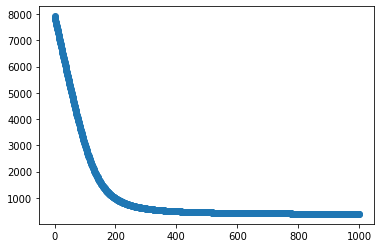

In [60]:
plt.scatter(range(num_iterations), all_costs)